#  lab 11

***Regression Analysis***

Suppose you have dataset with cars (CO2_passenger_cars2018b.csv). You what to know what features contribute to the increase of CO2 emission

1 Import needed libraries

2 read data from file

3 list dataset showing first 5 lines. View data types

4 verify possible values of categoric variable Ft

5 convert Petrol to PETROL and Diesel to DIESEL

6 verify again values of categoric variable Ft

7 convert variables 'm (kg)','ec (cm3)','ep (KW) and 'Enedc (g/km)' to numeric

    If ‘raise’, then invalid parsing will raise an exception
    If ‘coerce’, then invalid parsing will be set as NaN
    If ‘ignore’, then invalid parsing will return the input

8 remove all lines with NaN from df dataset and set to XY

9 create a Y vector and X matrix

10 create a regression model

11 analyse correlation between variables. Use seaborn. Like for example in:

    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=[12, 12])
    corr_mtx = XY.corr()
    sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
    plt.title('Correlation analysis')
    plt.show()

12 convert Ft into dummy variables

13 add dummy variable to a new data set XY2

14 create a Y vector and X matrix

15 create a regression model


In [143]:
'''
 Import needed libraries
'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [144]:
'''
read data from file
'''

df=pd.read_csv("CO2_passenger_cars2018b.csv", sep=",")

C:\Users\szakr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [145]:
'''
list dataset showing first 5 lines. View data types
'''

df.head(5)

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375,104.0,DIESEL,1598,85.0
1,VOLKSWAGEN,GOLF,1340,119.0,PETROL,1498,110.0
2,VOLKSWAGEN,GOLF,1320,120.0,PETROL,1498,110.0
3,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0
4,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0


In [146]:
'''
list dataset showing first 5 lines. View data types
'''

df.dtypes

Fabricante         object
CommercialName     object
m (kg)             object
Enedc (g/km)      float64
Ft                 object
ec (cm3)           object
ep (KW)           float64
dtype: object

In [147]:
'''
verify possible values of categoric variable Ft
'''
df['Ft'].unique()


array(['DIESEL', 'PETROL', nan, 'Petrol', 'Diesel'], dtype=object)

In [148]:
'''
convert Petrol to PETROL and Diesel to DIESEL
'''
df['Ft'] = df['Ft'].str.upper() 

df.head(10)


,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375,104.0,DIESEL,1598,85.0
1,VOLKSWAGEN,GOLF,1340,119.0,PETROL,1498,110.0
2,VOLKSWAGEN,GOLF,1320,120.0,PETROL,1498,110.0
3,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0
4,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0
5,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0
6,RENAULT,MEGANE,1280,95.0,DIESEL,1461,81.0
7,VOLKSWAGEN,GOLF,1245,106.0,PETROL,999,85.0
8,VOLKSWAGEN,GOLF,1375,107.0,DIESEL,1598,85.0
9,VOLKSWAGEN,GOLF,1375,107.0,DIESEL,1598,85.0


In [149]:
'''
verify again values of categoric variable Ft
'''
df['Ft'].unique()


array(['DIESEL', 'PETROL', nan], dtype=object)

In [150]:
'''
convert variables 'm (kg)','ec (cm3)','ep (KW) and 'Enedc (g/km)' to numeric

If ‘raise’, then invalid parsing will raise an exception
If ‘coerce’, then invalid parsing will be set as NaN
If ‘ignore’, then invalid parsing will return the input
'''
df1=df.copy()

for i in range(2,6):
        df1.iloc[:,i]=pd.to_numeric(df1.iloc[:,i], errors='coerce')
    
df1.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375.0,104.0,NaN,1598.0,85.0
1,VOLKSWAGEN,GOLF,1340.0,119.0,NaN,1498.0,110.0
2,VOLKSWAGEN,GOLF,1320.0,120.0,NaN,1498.0,110.0
3,VOLKSWAGEN,POLO,1145.0,104.0,NaN,999.0,70.0
4,VOLKSWAGEN,POLO,1145.0,104.0,NaN,999.0,70.0


In [151]:
'''
remove all lines with NaN from df dataset and set to XY
'''
XY = df1[['Fabricante','CommercialName','m (kg)',"Enedc (g/km)",'ec (cm3)','ep (KW)']]

XY1 = XY.dropna()

XY1.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375.0,104.0,1598.0,85.0
1,VOLKSWAGEN,GOLF,1340.0,119.0,1498.0,110.0
2,VOLKSWAGEN,GOLF,1320.0,120.0,1498.0,110.0
3,VOLKSWAGEN,POLO,1145.0,104.0,999.0,70.0
4,VOLKSWAGEN,POLO,1145.0,104.0,999.0,70.0


In [152]:
'''
create a Y vector and X matrix
'''
Y=XY1.iloc[:,[3]].as_matrix() #OR Y=XY1['Enedc (g/km)']

Y

X=XY1.iloc[:,[2,4,5]].as_matrix() #OR X=XY1['m (kg)','ec (cm3)','ep (KW)']

X

C:\Users\szakr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\szakr\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[1375., 1598.,   85.],
       [1340., 1498.,  110.],
       [1320., 1498.,  110.],
       ...,
       [1050., 1199.,   60.],
       [1050., 1199.,   60.],
       [1050., 1199.,   60.]])

In [153]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [154]:
'''
create a regression model (Method 1)
'''
regression = LinearRegression()
model = regression.fit(X, Y)

In [155]:
model.intercept_

array([63.15423332])

In [156]:
model.coef_

array([[ 0.02341013, -0.00154823,  0.31813156]])

In [157]:
model.score(X,Y)

0.47093858547224443

In [158]:
'''
create a regression model (Method 2)
'''

X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()

In [159]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                 2.800e+05
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:16:54   Log-Likelihood:            -3.9894e+06
No. Observations:              943803   AIC:                         7.979e+06
Df Residuals:                  943799   BIC:                         7.979e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.1542      0.095    665.650      0.000      62.968      63.340
x1             0.0234      0.000    214.603      0.000       0.023       0.024
x2            -0.0015   7.44e-05    -20.803      0.000      -0.002      -0.001
x3             0.3181      0.001    382.562      0.000       0.317       0.320
==============================================================================
Omnibus:                   141963.237   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1870252.998
Skew:                           0.282   Prob(JB):                         0.00
Kurtosis:                       9.873   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

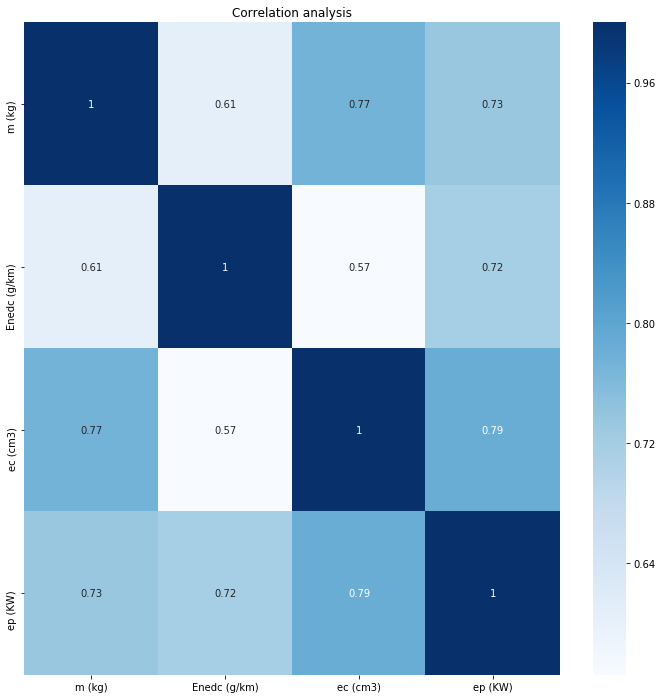

In [160]:
'''
 analyse correlation between variables. Use seaborn. Like for example in:

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12, 12])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()
'''
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12, 12])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()


In [161]:
'''
convert Ft into dummy variables
'''
df2 = df.copy()
df2['Ft']=df2['Ft'].replace('PETROL',0)
df2['Ft']=df2['Ft'].replace('DIESEL',1)



In [162]:
for i in range(2,6):
        df2.iloc[:,i]=pd.to_numeric(df2.iloc[:,i], errors='coerce')

In [163]:
'''
add dummy variable to a new data set XY2
'''

XY2 = df2.dropna()
XY2.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375.0,104.0,1.0,1598.0,85.0
1,VOLKSWAGEN,GOLF,1340.0,119.0,0.0,1498.0,110.0
2,VOLKSWAGEN,GOLF,1320.0,120.0,0.0,1498.0,110.0
3,VOLKSWAGEN,POLO,1145.0,104.0,0.0,999.0,70.0
4,VOLKSWAGEN,POLO,1145.0,104.0,0.0,999.0,70.0


In [164]:
'''
create a Y vector and X matrix
'''
Y1=XY2.iloc[:,[3]].as_matrix()
Y1

X1=XY2.iloc[:,[2,4,5,6]].as_matrix()
X1

C:\Users\szakr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\szakr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


array([[1.375e+03, 1.000e+00, 1.598e+03, 8.500e+01],
       [1.340e+03, 0.000e+00, 1.498e+03, 1.100e+02],
       [1.320e+03, 0.000e+00, 1.498e+03, 1.100e+02],
       ...,
       [1.050e+03, 0.000e+00, 1.199e+03, 6.000e+01],
       [1.050e+03, 0.000e+00, 1.199e+03, 6.000e+01],
       [1.050e+03, 0.000e+00, 1.199e+03, 6.000e+01]])

In [165]:
'''
create a regression model
'''
regression1 = LinearRegression()
model1 = regression1.fit(X1, Y1)

In [166]:
model1.intercept_

array([29.70545686])

In [167]:
model1.coef_

array([[ 5.40879228e-02, -2.66822078e+01,  1.72812603e-02,
         4.57921958e-02]])

In [168]:
model1.score(X1,Y1)

0.674022337178782

In [169]:
'''
Regression Method2
'''

X1=sm.add_constant(X1)
model1 = sm.OLS(Y1,X1).fit()

In [170]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                 4.843e+05
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:16:59   Log-Likelihood:            -3.7053e+06
No. Observations:              936948   AIC:                         7.411e+06
Df Residuals:                  936943   BIC:                         7.411e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7055      0.086    343.946      0.000      29.536      29.875
x1             0.0541   9.33e-05    579.827      0.000       0.054       0.054
x2           -26.6822      0.037   -718.408      0.000     -26.755     -26.609
x3             0.0173   6.29e-05    274.833      0.000       0.017       0.017
x4             0.0458      0.001     62.197      0.000       0.044       0.047
==============================================================================
Omnibus:                   159270.186   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1967789.771
Skew:                           0.444   Prob(JB):                         0.00
Kurtosis:                      10.044   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""